# 앙상블 학습
여러 모델로부터 예측을 수집, 일련의 예측기를 앙상블

### 랜덤 포레스트
결정 트리의 앙상블


### 투표 기반 분류기
분류기 여러개를 훈련시킨 모델을 다수결 투표로 분류 : 직접 투표 분류기

앙상블 기법은 A, B 클래스 중 A 확률이 나올 확률이 51퍼센트인 어떤 이진 분류기들 1000개를 구축했을 때, 75퍼센트의 정확도를 기대할 수 있다. 
(정확도가 51%에서 75%로 증가함)

수학적 원리는 이항분포와 확률 질량함수로 계산할 수 있다. 

그러나 분류기들이 대부분 같은 오류를 만들어 내기 때문에 앙상블의 정확도가 낮아진다. 
앙상블 기법은 각각의 모델들이 서로 독립적일 때 최고의 성능을 발휘한다. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voating_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting= 'hard'
)
voating_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [3]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voating_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.904


### Bagging & Pasting

Bagging : 훈련 세트에서 중복을 허용하여 샘플링하는 방식

Pasting : 훈련 세트에서 중복을 허용하지 않고 샘플링하는 방식

배깅만이 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링할 수 있다.

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=1
) # bootstrap = True : bagging, False : pasting

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

### oob 평가
bagging 사용 시 무작위로 샘플을 선택하기 때문에 선택되지 않는 샘플이 있을 수 있다. 

평균적으로 63% 정도만 샘플링 된다. 
남겨진 샘플에 대해 oob라 한다. 

In [5]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8906666666666667

In [8]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

decision_funciton
음성 클래스에 속할 확률 , 양성 클래스에 속할 확률

In [7]:
bag_clf.oob_decision_function_

array([[0.3908046 , 0.6091954 ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09230769, 0.90769231],
       [0.38333333, 0.61666667],
       [0.01530612, 0.98469388],
       [0.96842105, 0.03157895],
       [0.98395722, 0.01604278],
       [0.74074074, 0.25925926],
       [0.00534759, 0.99465241],
       [0.80952381, 0.19047619],
       [0.84293194, 0.15706806],
       [0.95187166, 0.04812834],
       [0.04444444, 0.95555556],
       [0.        , 1.        ],
       [0.98351648, 0.01648352],
       [0.94059406, 0.05940594],
       [0.99484536, 0.00515464],
       [0.01648352, 0.98351648],
       [0.40540541, 0.59459459],
       [0.91282051, 0.08717949],
       [1.        , 0.        ],
       [0.98203593, 0.01796407],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61702128, 0.38297872],
       [0.

### 랜덤 포레스트
배깅 방법을 적용한 결정 트리의 앙상블
전형적으로 max_samples를 훈련 세트의 크기로 지정한다. (전체 데이터 셋 아님)



In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators= 500, max_leaf_nodes= 16, n_jobs= -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

[Text(0.38461538461538464, 0.9166666666666666, 'x[0] <= 5.45\ngini = 0.667\nsamples = 96\nvalue = [51, 49, 50]'),
 Text(0.15384615384615385, 0.75, 'x[2] <= 2.45\ngini = 0.201\nsamples = 33\nvalue = [47, 6, 0]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 30\nvalue = [47, 0, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 6, 0]'),
 Text(0.6153846153846154, 0.75, 'x[3] <= 1.7\ngini = 0.536\nsamples = 63\nvalue = [4, 43, 50]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[3] <= 0.7\ngini = 0.287\nsamples = 33\nvalue = [4, 41, 4]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [4, 0, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[0] <= 7.1\ngini = 0.162\nsamples = 30\nvalue = [0, 41, 4]'),
 Text(0.38461538461538464, 0.25, 'x[2] <= 4.95\ngini = 0.127\nsamples = 29\nvalue = [0, 41, 3]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 27\nvalue = [0, 41

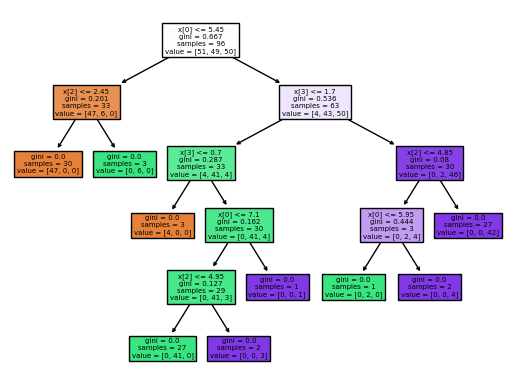

In [13]:
from sklearn.tree import plot_tree

# 예시: 첫 번째 트리를 시각화
plot_tree(rnd_clf.estimators_[0], filled=True)

### 특성 중요도
랜덤 포레스트는 상대적 중요도를 측정하기 쉽다. 

평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정한다. 특성마다 자동으로 이 점수를 계산하고 중요도의 전체 합이 1이되도록 결과값을 정규화한다. 아래 petal length, petal width가 중요한 특성으로 보인다.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0948414109289105
sepal width (cm) 0.022495841017577258
petal length (cm) 0.43171720227446336
petal width (cm) 0.45094554577904894


In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)